In [23]:
from torchvision import models
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch  
import numpy as np
from imageio import imread
from skimage.color import rgb2gray, gray2rgb
import cv2
from skimage.feature import canny
import torchvision.transforms.functional as F

In [24]:
from src.segmentor_fcn import decode_segmap, fill_gaps, fill_gaps2, remove_patch_og, segmentor

In [25]:
def to_tensor(img):
    img = Image.fromarray(img)
    img_t = F.to_tensor(img).float()
    #img_t = torch.from_numpy(np.array(img, np.float32, copy=False))
    return img_t

In [26]:
def load_edge(img, mask):
    sigma = 2

    # in test mode images are masked (with masked regions),
    # using 'mask' parameter prevents canny to detect edges for the masked regions
    mask = None
        
    # canny
    # no edge
    if sigma == -1:
        return np.zeros(img.shape).astype(np.float)

    # random sigma
    if sigma == 0:
        sigma = random.randint(1, 4)

    return canny(img, sigma=sigma, mask=mask).astype(np.float)

In [27]:
input_size = 256
input_image = "Images/Inputs/9.jpg"
segment_net = 2
device = "cpu"
objects = [3, 15]

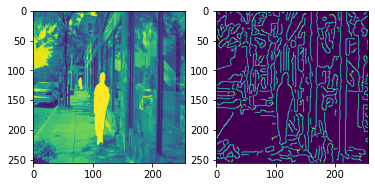

In [28]:
img = Image.open(input_image)
#Create_img and mask
img,mask=segmentor(segment_net, img, device, objects)
#Resize image
img = Image.fromarray(img)
img = np.array(img.resize((input_size, input_size), Image.ANTIALIAS))
# create grayscale image
img_gray = rgb2gray(np.array(img))
#Resize mask
mask = Image.fromarray(mask)
mask = np.array(mask.resize((input_size, input_size), Image.ANTIALIAS))
idx=(mask>0)
mask[idx]=255
mask=np.apply_along_axis(fill_gaps, 1, mask) #horizontal padding
mask=np.apply_along_axis(fill_gaps, 0, mask) #vertical padding

# load edge
edge = load_edge(img_gray, mask)

# augment data
#img = img[:, ::-1, ...]
#img_gray = img_gray[:, ::-1, ...]
#edge = edge[:, ::-1, ...]
#mask = mask[:, ::-1, ...]

img_input = to_tensor(img)
img_gray_input = to_tensor(img_gray)
edge_input = to_tensor(edge)
mask_input = to_tensor(mask)

cv2.imwrite("Images/img/img_input.jpg", img)
cv2.imwrite("Images/img/img_gray.jpg", img_gray)
cv2.imwrite("Images/img/edge.jpg", edge)
cv2.imwrite("Images/img/mask.jpg", mask)

# plt.subplot(1,4,1)
# plt.imshow(img)
plt.subplot(1,2,1)
plt.imshow(img_gray)
plt.subplot(1,2,2)
plt.imshow(edge)
# plt.subplot(1,4,4)
# plt.imshow(mask)
plt.show()
